In [1]:
# import important libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# calling prima indian diabetes dataset using pandas library
pdd=pd.read_csv('Pima indian diabetes')

In [3]:
# open databases
pdd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Observation - Above data has 768 rows and 8 columns. the last column shows if the person have diabetes or not. so will use LogisticRegression.  

1- first column shows data for number of times pregnant.

2- second column shows data for Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3- third column shows data for Diastolic blood pressure(mm Hg)

4- fourth column shows data for Triceps skin fold thickness (mm)

5- fifth column shows data for 2-Hour serum insulin (mu U/ml)

6- sixth column shows data for Body mass index (weight in kg/(height in m)^2)

7- seventh column shows data for Diabetes pedigree function

8- eighth column shows Age data in years

9- last column is target variable. it shows if the person have diabetes or not. label -> 1: diabetes, label -> 0: no diabetes

In [4]:
# checking columns name
pdd.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Checking databases info
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Observation - There is no null values. The dataset data type is int64 except BMI and DiabetesPedigreeFunction. BMI and DiabetesPedigreeFunction have float64 data type. 

In [6]:
# Checking null values using another method
pdd.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

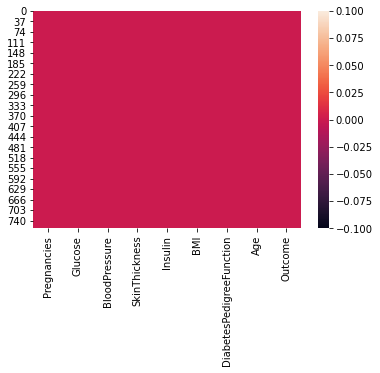

In [7]:
#Checking null values using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pdd.isnull())

In [8]:
# Checking how may patient have diabetes or don't have diabetes
pdd['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Observation - The above data shows 500 people don't have diabetes and 268 have diabetes, so we assume there is mix of data. 

In [9]:
# Checking column shape
pdd.shape

(768, 9)

In [10]:
# Checking data type using another method
pdd.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Summary Statistics

In [11]:
# Checking general summary statistics of dataset
pdd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observation - There are huge difference between 75% and maximum in columns Pregnancies, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, So in these columns outliers may be present.

Std maximum in Insulin.

# Data Visualization

Univariate Analysis

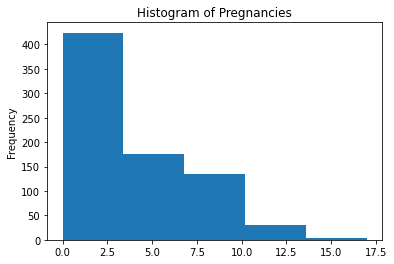

In [12]:
pdd['Pregnancies'].plot.hist(bins=5)
plt.title('Histogram of Pregnancies')
plt.show()

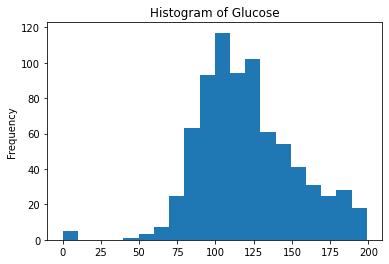

In [13]:
pdd['Glucose'].plot.hist(bins=20)
plt.title('Histogram of Glucose')
plt.show()

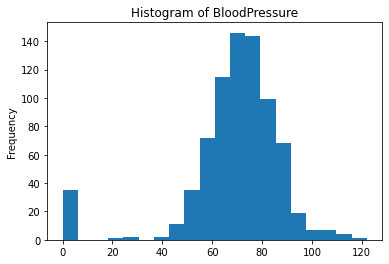

In [14]:
pdd['BloodPressure'].plot.hist(bins=20)
plt.title('Histogram of BloodPressure')
plt.show()

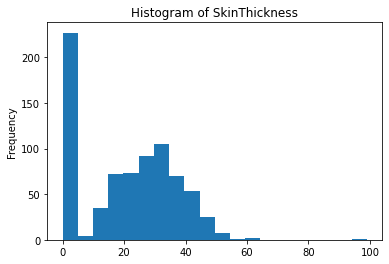

In [15]:
pdd['SkinThickness'].plot.hist(bins=20)
plt.title('Histogram of SkinThickness')
plt.show()

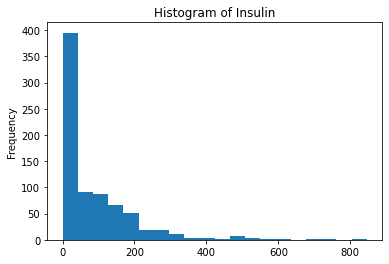

In [16]:
pdd['Insulin'].plot.hist(bins=20)
plt.title('Histogram of Insulin')
plt.show()

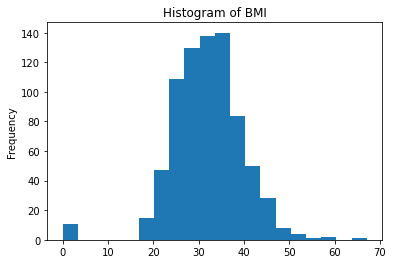

In [17]:
pdd['BMI'].plot.hist(bins=20)
plt.title('Histogram of BMI')
plt.show()

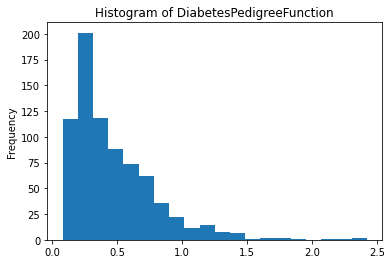

In [18]:
pdd['DiabetesPedigreeFunction'].plot.hist(bins=20)
plt.title('Histogram of DiabetesPedigreeFunction')
plt.show()

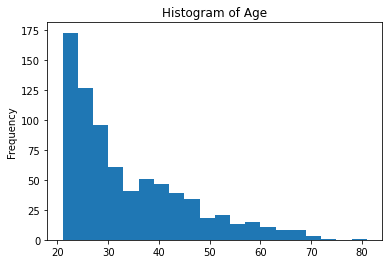

In [19]:
pdd['Age'].plot.hist(bins=20)
plt.title('Histogram of Age')
plt.show()

# Plotting outliers

In [20]:
pdd.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

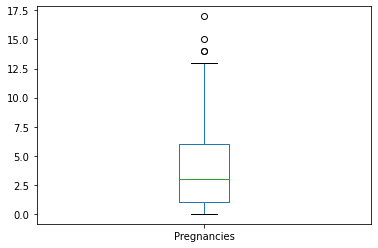

In [21]:
pdd['Pregnancies'].plot.box()

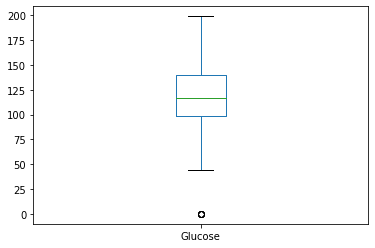

In [22]:
pdd['Glucose'].plot.box()

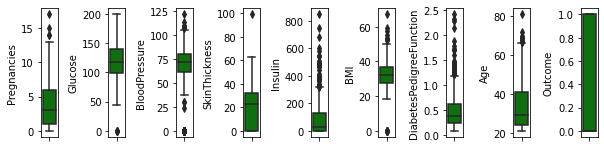

In [23]:
collist=pdd.columns.values
ncol=17
nrow=10

plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(pdd[collist[i]],color='green',orient='v')
    plt.tight_layout()

Observation - Above Graph shows outliers present in all columns except outcome column. 

# Removing outlers

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(pdd))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [25]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [26]:
pdd_new=pdd[(z<3).all(axis=1)]

In [27]:
print(pdd.shape)

(768, 9)


In [28]:
print(pdd_new.shape)

(688, 9)


In [29]:
pdd=pd.DataFrame(data=pdd_new)

Observation - Now we can see eighty rows removed from dataset due to outliers

In [30]:
pdd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# check the distribution of Skewnewss

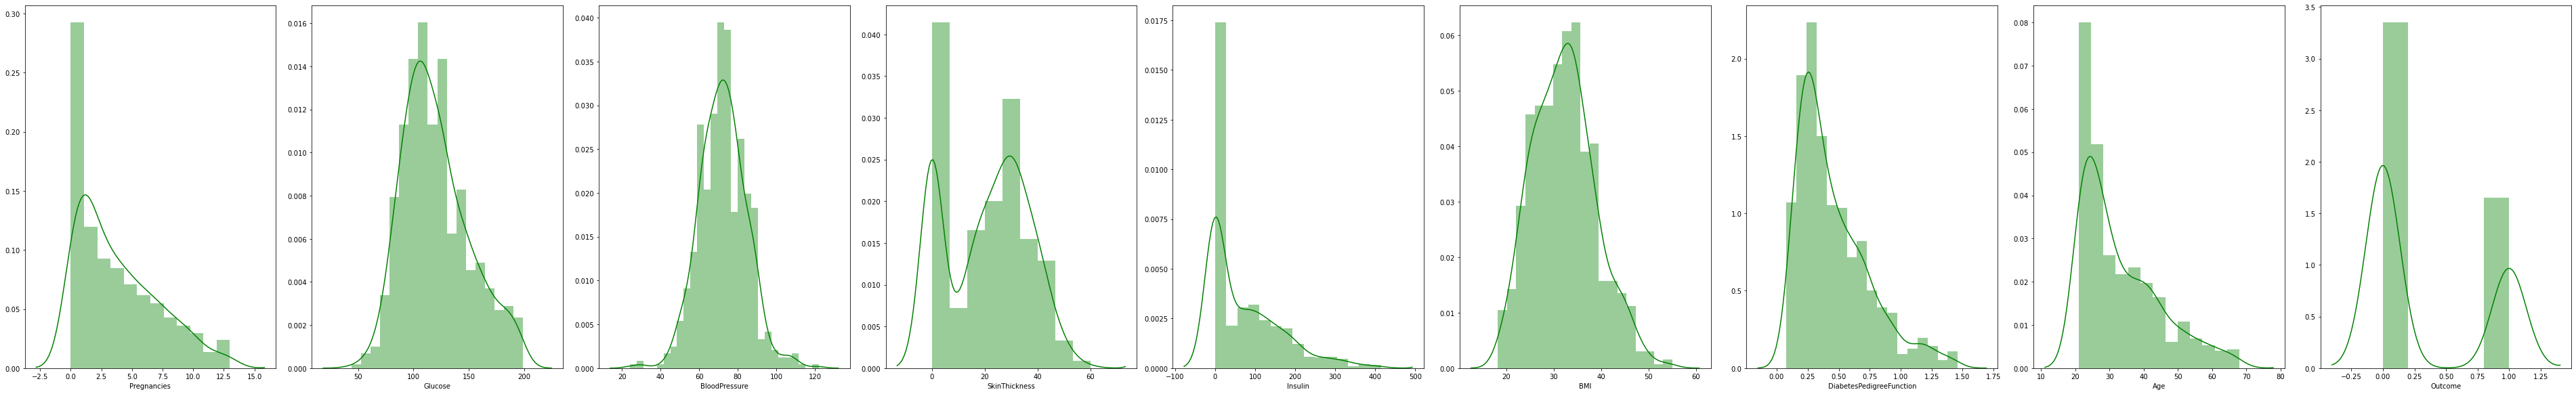

In [31]:
plt.figure(figsize=(100,80))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(pdd[collist[i]],color='green')
    plt.tight_layout()

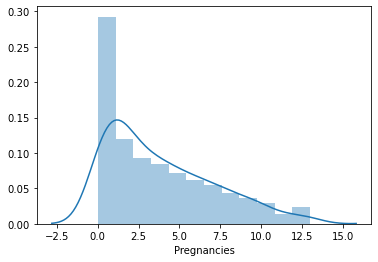

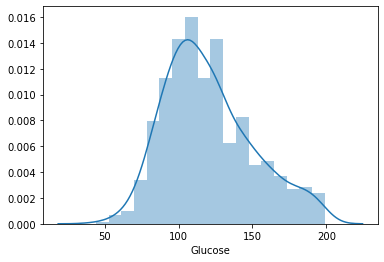

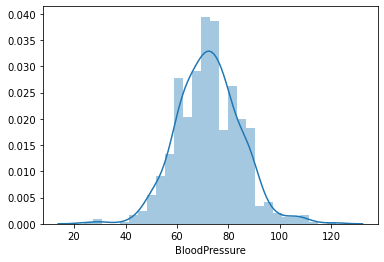

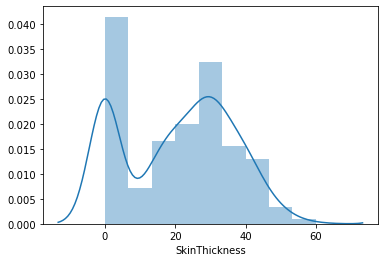

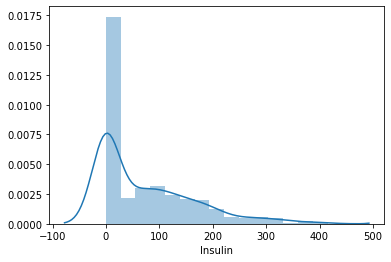

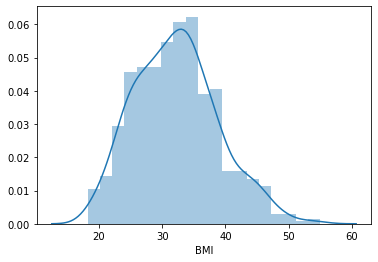

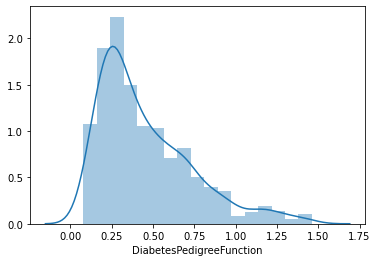

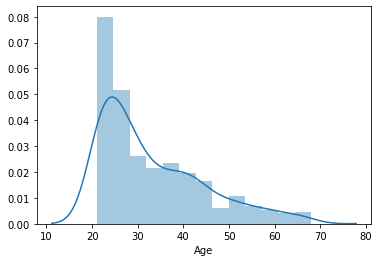

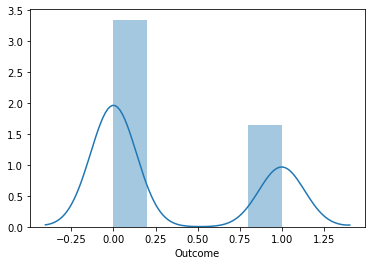

In [32]:
for i in pdd.columns:
    sns.distplot(pdd[i])
    plt.show()

In [33]:
#Checking skewness of the data
pdd.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

Separating data into input and output variables

In [34]:
x=pd.DataFrame(pdd.drop(columns=['Outcome']))
y=pd.DataFrame(pdd['Outcome'])

In [35]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
y

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


In [37]:
# Treating skewness via log method

for col in x.columns:
    if x[col].skew()>0.55:
        x[col]=np.log1p(x[col])

In [38]:
#Checking skewness again
x.skew()

Pregnancies                -0.267943
Glucose                    -0.038604
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                    -0.018506
BMI                         0.374415
DiabetesPedigreeFunction    0.790451
Age                         0.576242
dtype: float64

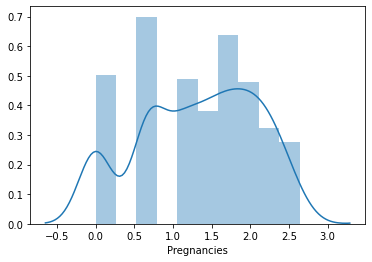

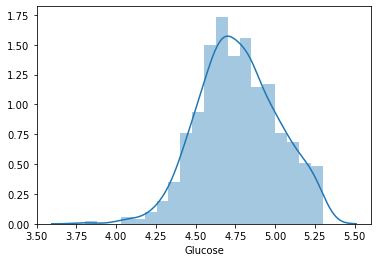

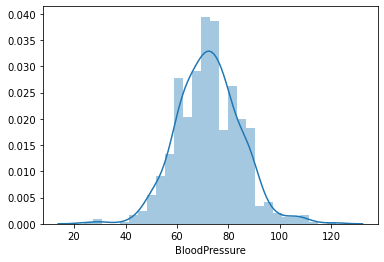

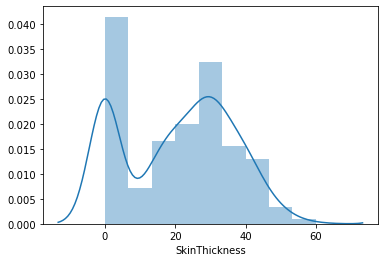

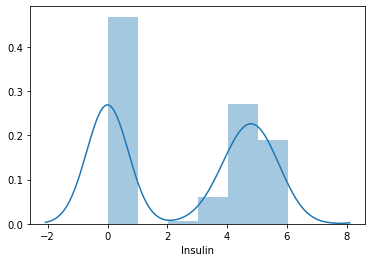

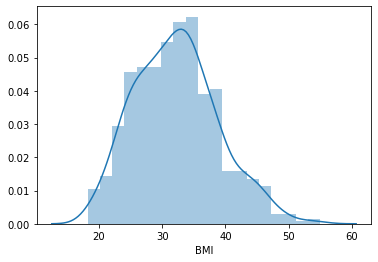

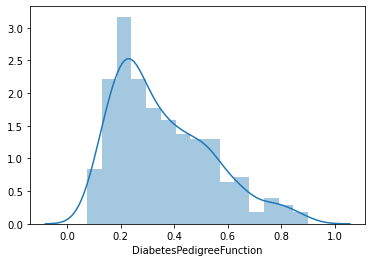

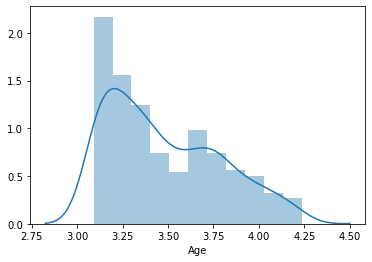

In [39]:
for i in x.columns:
    sns.distplot(x[i])
    plt.show()

In [40]:
x.shape

(688, 8)

In [41]:
# Use StandrdScaler method
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Model Training

In [42]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
x_train.shape

(516, 8)

In [45]:
x_test.shape

(172, 8)

In [46]:
y_train.shape

(516, 1)

In [47]:
y_test.shape

(172, 1)

In [48]:
lg=LogisticRegression()

In [49]:
lg.fit(x_train,y_train)

LogisticRegression()

In [50]:
pred=lg.predict(x_test)
print(pred)

[0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [51]:
print('accuracy_score:' , accuracy_score(y_test,pred))

accuracy_score: 0.7558139534883721


In [52]:
print(confusion_matrix(y_test,pred))

[[97  8]
 [34 33]]


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       105
           1       0.80      0.49      0.61        67

    accuracy                           0.76       172
   macro avg       0.77      0.71      0.72       172
weighted avg       0.77      0.76      0.74       172



In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

0.6802325581395349


In [55]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7558139534883721
[[97  8]
 [34 33]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       105
           1       0.80      0.49      0.61        67

    accuracy                           0.76       172
   macro avg       0.77      0.71      0.72       172
weighted avg       0.77      0.76      0.74       172



Accuracy score of GaussianNB() is:
0.7441860465116279
[[89 16]
 [28 39]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       105
           1       0.71      0.58      0.64        67

    accuracy                           0.74       172
   macro avg       0.73      0.71      0.72       172
weighted avg       0.74      0.74      0.74       172



Accuracy score of SVC() is:
0.7383720930232558
[[94 11]
 [34 33]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       105
           1 

Observation - Above accuracy score shows best one is SVC.

In [56]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[0,1,2,3,4,5,6,7,8,9,10,11,12]}
svc=SVC()
gs=GridSearchCV(svc,parameters)
gs.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [57]:
print(gs.best_params_)

{'C': 3, 'kernel': 'linear'}


In [58]:
#Using SVC model with best results
sv=SVC(kernel='linear',C=3)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy score of',sv, 'is:')
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))
print('\n')

Accuracy score of SVC(C=3, kernel='linear') is:
0.7558139534883721
[[97  8]
 [34 33]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       105
           1       0.80      0.49      0.61        67

    accuracy                           0.76       172
   macro avg       0.77      0.71      0.72       172
weighted avg       0.77      0.76      0.74       172





# Using Ensemble Technique to boostup score

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7732558139534884
[[96  9]
 [30 37]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       105
           1       0.80      0.55      0.65        67

    accuracy                           0.77       172
   macro avg       0.78      0.73      0.74       172
weighted avg       0.78      0.77      0.76       172



In [60]:
from sklearn.ensemble import AdaBoostClassifier
#AdaboostClassifier(base_estimator=DecisionTreeClassifier(),n_estimator=50,learning_rate=1.0)
lg=LogisticRegression()
ad=AdaBoostClassifier(n_estimators=100,random_state=42,base_estimator=sv,algorithm='SAMME',learning_rate=0.01)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7674418604651163
[[102   3]
 [ 37  30]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.84       105
           1       0.91      0.45      0.60        67

    accuracy                           0.77       172
   macro avg       0.82      0.71      0.72       172
weighted avg       0.80      0.77      0.74       172



In [61]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7151162790697675
[[91 14]
 [35 32]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       105
           1       0.70      0.48      0.57        67

    accuracy                           0.72       172
   macro avg       0.71      0.67      0.68       172
weighted avg       0.71      0.72      0.70       172



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)

gba=gb.predict(x_test)
print(accuracy_score(y_test,gba))
print(confusion_matrix(y_test,gba))
print(classification_report(y_test,gba))


0.7441860465116279
[[94 11]
 [33 34]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       105
           1       0.76      0.51      0.61        67

    accuracy                           0.74       172
   macro avg       0.75      0.70      0.71       172
weighted avg       0.75      0.74      0.73       172



In [63]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'random_state':range(0,100)}
gc=GridSearchCV(sv,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 0}

In [64]:
# Cross validate of AdaBoostClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.72463768 0.72463768 0.76811594 0.80291971 0.81021898]
Mean Score: 0.03672733787736614
Standard Deviation: 0.03672733787736614


In [65]:
from sklearn.ensemble import AdaBoostClassifier
#AdaboostClassifier(base_estimator=DecisionTreeClassifier(),n_estimator=50,learning_rate=1.0)
lm=LogisticRegression()
ad=AdaBoostClassifier(n_estimators=100,random_state=55,base_estimator=lm,algorithm='SAMME',learning_rate=1.2)

ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7093023255813954
[[72 33]
 [17 50]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       105
           1       0.60      0.75      0.67        67

    accuracy                           0.71       172
   macro avg       0.71      0.72      0.70       172
weighted avg       0.73      0.71      0.71       172



In [66]:
# AUC ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [67]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.47, 0.06, 0.37, 0.31, 0.76, 0.83, 0.19, 0.2 , 0.11, 0.  , 0.18,
       0.42, 0.72, 0.22, 0.72, 0.53, 0.19, 0.23, 0.29, 0.01, 0.53, 0.23,
       0.4 , 0.04, 0.03, 0.05, 0.51, 0.55, 0.48, 0.68, 0.42, 0.27, 0.71,
       0.29, 0.08, 0.36, 0.12, 0.23, 0.23, 0.01, 0.4 , 0.23, 0.13, 0.39,
       0.22, 0.85, 0.33, 0.38, 0.  , 0.33, 0.26, 0.12, 0.06, 0.77, 0.3 ,
       0.48, 0.89, 0.09, 0.22, 0.03, 0.51, 0.63, 0.05, 0.6 , 0.08, 0.01,
       0.77, 0.25, 0.83, 0.13, 0.28, 0.51, 0.12, 0.64, 0.82, 0.5 , 0.45,
       0.25, 0.06, 0.93, 0.27, 0.02, 0.54, 0.24, 0.41, 0.58, 0.08, 0.61,
       0.67, 0.38, 0.09, 0.19, 0.01, 0.63, 0.  , 0.85, 0.55, 0.14, 0.07,
       0.06, 0.35, 0.38, 0.11, 0.02, 0.06, 0.66, 0.44, 0.06, 0.42, 0.46,
       0.65, 0.29, 0.11, 0.27, 0.78, 0.02, 0.75, 0.03, 0.13, 0.4 , 0.13,
       0.42, 0.05, 0.13, 0.12, 0.74, 0.02, 0.46, 0.44, 0.4 , 0.05, 0.1 ,
       0.52, 0.02, 0.2 , 0.61, 0.56, 0.33, 0.19, 0.46, 0.04, 0.58, 0.75,
       0.54, 0.28, 0.53, 0.21, 0.62, 0.63, 0.11, 0.

In [68]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [69]:
fpr

array([0.        , 0.        , 0.        , 0.00952381, 0.00952381,
       0.00952381, 0.00952381, 0.00952381, 0.00952381, 0.00952381,
       0.00952381, 0.00952381, 0.02857143, 0.02857143, 0.03809524,
       0.04761905, 0.04761905, 0.06666667, 0.07619048, 0.07619048,
       0.07619048, 0.07619048, 0.07619048, 0.07619048, 0.08571429,
       0.0952381 , 0.11428571, 0.14285714, 0.15238095, 0.17142857,
       0.18095238, 0.2       , 0.20952381, 0.20952381, 0.22857143,
       0.25714286, 0.26666667, 0.26666667, 0.2952381 , 0.32380952,
       0.33333333, 0.35238095, 0.36190476, 0.38095238, 0.39047619,
       0.40952381, 0.44761905, 0.47619048, 0.48571429, 0.5047619 ,
       0.54285714, 0.54285714, 0.58095238, 0.65714286, 0.66666667,
       0.6952381 , 0.71428571, 0.72380952, 0.78095238, 0.80952381,
       0.82857143, 0.86666667, 0.92380952, 0.97142857, 1.        ])

In [70]:
tpr

array([0.        , 0.01492537, 0.02985075, 0.04477612, 0.07462687,
       0.10447761, 0.13432836, 0.14925373, 0.17910448, 0.19402985,
       0.25373134, 0.26865672, 0.28358209, 0.31343284, 0.31343284,
       0.34328358, 0.35820896, 0.35820896, 0.35820896, 0.3880597 ,
       0.40298507, 0.46268657, 0.50746269, 0.52238806, 0.55223881,
       0.55223881, 0.58208955, 0.58208955, 0.58208955, 0.6119403 ,
       0.6119403 , 0.64179104, 0.64179104, 0.71641791, 0.71641791,
       0.71641791, 0.71641791, 0.74626866, 0.74626866, 0.74626866,
       0.7761194 , 0.79104478, 0.82089552, 0.82089552, 0.8358209 ,
       0.8358209 , 0.85074627, 0.85074627, 0.85074627, 0.85074627,
       0.88059701, 0.91044776, 0.92537313, 0.92537313, 0.92537313,
       0.95522388, 0.97014925, 0.98507463, 0.98507463, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [71]:
thresholds

array([1.93, 0.93, 0.89, 0.85, 0.83, 0.78, 0.77, 0.76, 0.75, 0.74, 0.71,
       0.68, 0.67, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.58, 0.56, 0.54,
       0.53, 0.52, 0.51, 0.5 , 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41,
       0.4 , 0.39, 0.38, 0.37, 0.35, 0.33, 0.3 , 0.29, 0.28, 0.27, 0.26,
       0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.14, 0.13, 0.11, 0.1 ,
       0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

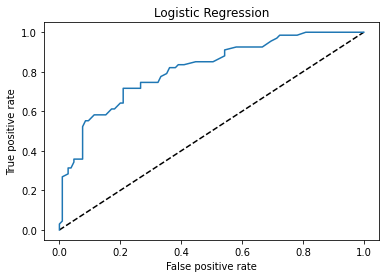

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [73]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [74]:
print(auc_score)

0.7332622601279318


Note - Find out best result with RandomForestClassifier by using varius technics. So i will save RandomForestClassifier as my final model.

In [75]:
# Saving the RandomForestRegressor\
import joblib
joblib.dump(rf,'Pima Indian diabetes .pkl')

['Pima Indian diabetes .pkl']